# Import dataframe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SharkData_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSXJqQfbL6EQ5u7SHO2wjw34BOv_VO6ZyDrBQXJwXghJPeYd5_-pd90sRKapKip8w/pub?output=csv')

In [3]:
df = SharkData_df.iloc[:, :15]
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source
0,15 Mar 2024,2024,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",NaN,16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",N,NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,N,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,N,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,N,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning Dates and Year


## Cleaning the 'Year' series

In [4]:
df1 = df.copy()
# CLEAN COLUMN YEAR
# Replace ',' in Year by '.' if Year is string
#------------------------------
if df1['Year'].dtypes != 'float64':
  df1['Year'] = df1['Year'].str.replace(",", ".")
#cast Year into a float
#------------------------------
df1['Year'] = df1['Year'].astype(float)

print('CHECKING FOR DATA BASIES OVER TIME')
# filter zero values in Year
filtered_df1 = df1[(df1['Year'] != 0) & (df1['Year'] >= 1800) & (df1['Year'] < 2024) ]
filtered_df1
filtered_df1['Year'].value_counts().sort_index()



CHECKING FOR DATA BASIES OVER TIME


Year
1800.0      1
1801.0      1
1802.0      1
1803.0      2
1804.0      1
         ... 
2019.0    114
2020.0    101
2021.0    109
2022.0     98
2023.0    108
Name: count, Length: 213, dtype: int64

## Selecting a timeframe

-------------------------------------------------------------------------------------------------------------------------------------------
After the year of 2000 number of reports is higher. To exclude any data basies we choose to study cases of shark attacks between 2000-2023
-------------------------------------------------------------------------------------------------------------------------------------------


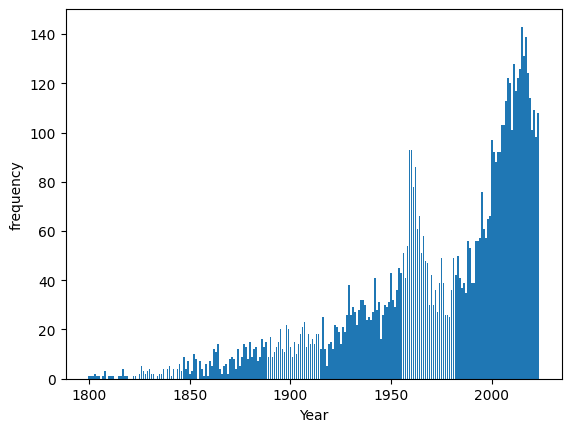

In [5]:
# -------------------------------------------------------------------------------------
# check the frequency of the reports since 1800
print('-------------------------------------------------------------------------------------------------------------------------------------------')
print('After the year of 2000 number of reports is higher. To exclude any data basies we choose to study cases of shark attacks between 2000-2023')
print('-------------------------------------------------------------------------------------------------------------------------------------------')
frequency = filtered_df1['Year'].value_counts()
x = frequency.index.to_list()
y = list(frequency.values)
fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('Year')
plt.bar(x,y)
plt.show()

Frequency of Shark Attacks over the world between 2000-2023
-----------------------------------------------------------


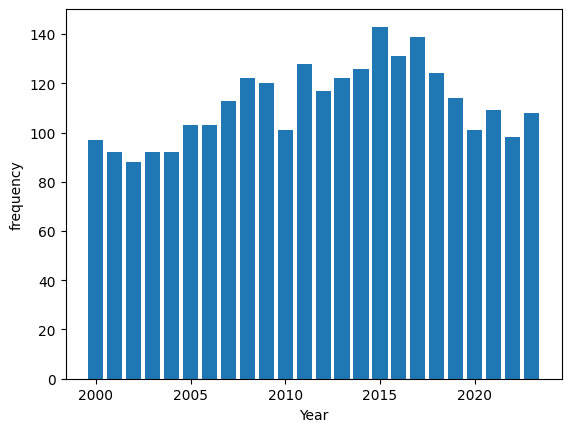

In [6]:
print('Frequency of Shark Attacks over the world between 2000-2023')
print('-----------------------------------------------------------')
filtered_df1 = df1[(df1['Year'] != 0) & (df1['Year'] >= 2000) & (df1['Year'] < 2024) ]
filtered_df1
filtered_df1['Year'].value_counts().sort_index()
# -------------------------------------------------------------------------------------
# check the frequency of the reports since 1920

frequency = filtered_df1['Year'].value_counts()
x = frequency.index.to_list()
y = list(frequency.values)
fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('Year')
plt.bar(x,y)
plt.show()

## Filtered Dataframe by selected timeframe [2000 - 2023]

In [7]:
filtered_df1

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source
10,30 Dec-2023,2023.0,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surfing,Jason Carter,M,39,FATAL,Y,11h12,NaN,"Surfer, 12/31/2023"
11,29 Dec-2023,2023.0,Unprovoked,MEXICO,Sonora,"Tojahui Beach, Yavaros, Huatabampo",Free diving,Víctor Alejandro “N”,M,22,FATAL,Y,13h00,White shark,"EuroESEuro, 12/31/2023"
12,28 Dec-2023,2023.0,Unprovoked,AUSTRALIA,South Australia,Ethel Beach,Surfing,Khai Cowley,M,15,FATAL,Y,13h30,"White shark, 13'","S. DeMarchi, GSAF"
13,25 Dec-2023,2023.0,Unprovoked,AUSTRALIA,New South Wales,Old Bar,Surfing,Julian McLennan,M,16,Injury to right thigh,N,16h30,NaN,"9 News, 12/26/2023"
14,24-Dec-2023,2023.0,Unprovoked,AUSTRALIA,Western Australia,Wedge Island,Foil Boarding,Troy Brown,M,46,Puncture wounds to right ankle,N,15h00,Broze whaler?,"9 News, 12/25/2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,03-Feb-2000,2000.0,Unprovoked,NEW ZEALAND,South Island,Oreti Beach (reported as the 4th person bitten...,Surfing,Michael Petas,M,12,"No injury, wetsuit punctured",N,NaN,NaN,"Waikato Times; Southland Times, 10/23/1999, p.1"
2690,01-Feb-2000,2000.0,Unprovoked,AUSTRALIA,South Australia,"Point Sinclair, Cactus Beach near Penong",Surfing,Anthony Hayes,M,26,Hand bitten,N,NaN,3 m [10'] shark,"T. Peake, GSAF"
2691,Reported 28-Jan-2000,2000.0,Watercraft,REUNION,NaN,Saint Pierre,Canoe with 3 men onboard sank,Boulabhaï Ishmael,M,NaN,FATAL,Y,NaN,NaN,B.L. du Vendre
2692,05-Jan-2000,2000.0,Unprovoked,THAILAND,Phang nga Province,Phang nga Island,Diving,Stephan Kahl,M,35,FATAL,Y,NaN,NaN,A. Xuereb


## Cleaning 'Date' Series and cast to a DateFormat YYYY-MM-DD

In [8]:
filtered_df1['Date'] = filtered_df1['Date'].str.replace('Reported ', '')
filtered_df1['Date'] = filtered_df1['Date'].str.replace(' ', '-')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('--', '-')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('`', '')

<ipython-input-8-7ee4de1270c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Date'] = filtered_df1['Date'].str.replace('Reported ', '')
<ipython-input-8-7ee4de1270c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Date'] = filtered_df1['Date'].str.replace(' ', '-')
<ipython-input-8-7ee4de1270c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [9]:
filtered_df1['Date'] = filtered_df1['Date'].str.replace('Nox', 'Nov')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('June', 'Jun')
filtered_df1['Date'].iloc[374] = filtered_df1['Date'].iloc[374].replace('10-Jul-202', '10-Jul-2020')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('Jun-1018', 'Jun-2018')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('Late-Jul-2008', '30-Jul-2008')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('Fall-2008', '01-10-2008')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('Summer-2008', '01-07-2008')
filtered_df1['Date'].iloc[1960] = filtered_df1['Date'].iloc[1960].replace('19-Jul-2007.b', '19-Jul-2007')
filtered_df1['Date'].iloc[1961] = filtered_df1['Date'].iloc[1961].replace('19-Jul-2007.a', '19-Jul-2007')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('Early-Aug-2006', '01-08-2006')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('-19-Jul-2004-to-have-happened-"on-the-weekend"', '19-07-2004')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('Late-Jul-2003', '30-07-2003')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('02-Ap-2001', '02-Apr-2001')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('Early-Sep-2000', '01-Sep-2000')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('Early-Jun-2000', '01-Jun-2000')
filtered_df1['Date'] = filtered_df1['Date'].str.replace('190Feb-2010', '19-Feb-2010')


<ipython-input-9-e07f4ee9ef5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Date'] = filtered_df1['Date'].str.replace('Nox', 'Nov')
<ipython-input-9-e07f4ee9ef5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Date'] = filtered_df1['Date'].str.replace('June', 'Jun')
<ipython-input-9-e07f4ee9ef5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [10]:
filtered_df1['Date'] = pd.to_datetime(filtered_df1['Date'],dayfirst=True,format='mixed')
filtered_df1

<ipython-input-10-24239bbecc79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Date'] = pd.to_datetime(filtered_df1['Date'],dayfirst=True,format='mixed')


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source
10,2023-12-30,2023.0,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surfing,Jason Carter,M,39,FATAL,Y,11h12,NaN,"Surfer, 12/31/2023"
11,2023-12-29,2023.0,Unprovoked,MEXICO,Sonora,"Tojahui Beach, Yavaros, Huatabampo",Free diving,Víctor Alejandro “N”,M,22,FATAL,Y,13h00,White shark,"EuroESEuro, 12/31/2023"
12,2023-12-28,2023.0,Unprovoked,AUSTRALIA,South Australia,Ethel Beach,Surfing,Khai Cowley,M,15,FATAL,Y,13h30,"White shark, 13'","S. DeMarchi, GSAF"
13,2023-12-25,2023.0,Unprovoked,AUSTRALIA,New South Wales,Old Bar,Surfing,Julian McLennan,M,16,Injury to right thigh,N,16h30,NaN,"9 News, 12/26/2023"
14,2023-12-24,2023.0,Unprovoked,AUSTRALIA,Western Australia,Wedge Island,Foil Boarding,Troy Brown,M,46,Puncture wounds to right ankle,N,15h00,Broze whaler?,"9 News, 12/25/2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,2000-02-03,2000.0,Unprovoked,NEW ZEALAND,South Island,Oreti Beach (reported as the 4th person bitten...,Surfing,Michael Petas,M,12,"No injury, wetsuit punctured",N,NaN,NaN,"Waikato Times; Southland Times, 10/23/1999, p.1"
2690,2000-02-01,2000.0,Unprovoked,AUSTRALIA,South Australia,"Point Sinclair, Cactus Beach near Penong",Surfing,Anthony Hayes,M,26,Hand bitten,N,NaN,3 m [10'] shark,"T. Peake, GSAF"
2691,2000-01-28,2000.0,Watercraft,REUNION,NaN,Saint Pierre,Canoe with 3 men onboard sank,Boulabhaï Ishmael,M,NaN,FATAL,Y,NaN,NaN,B.L. du Vendre
2692,2000-01-05,2000.0,Unprovoked,THAILAND,Phang nga Province,Phang nga Island,Diving,Stephan Kahl,M,35,FATAL,Y,NaN,NaN,A. Xuereb


## Creating a new Series grouping months to Seasons [summer, winter, spring, fall]



In [11]:
##################################
# Append a new columns with Months
# and with seasons
##################################
filtered_df1['Month'] = filtered_df1['Date'].dt.month_name()

def season(month):
    if month == 'July' or month == 'June' or month == 'August':
        return 'summer'
    elif month == 'December' or month == 'January' or month == 'February':
        return 'winter'
    elif month == 'March' or month == 'April' or month == 'May':
        return 'spring'
    else:
        return 'fall'

filtered_df1['Season'] = filtered_df1['Month'].apply(season)
filtered_df1


<ipython-input-11-76bb3ba63d5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Month'] = filtered_df1['Date'].dt.month_name()
<ipython-input-11-76bb3ba63d5d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Season'] = filtered_df1['Month'].apply(season)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,Month,Season
10,2023-12-30,2023.0,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surfing,Jason Carter,M,39,FATAL,Y,11h12,NaN,"Surfer, 12/31/2023",December,winter
11,2023-12-29,2023.0,Unprovoked,MEXICO,Sonora,"Tojahui Beach, Yavaros, Huatabampo",Free diving,Víctor Alejandro “N”,M,22,FATAL,Y,13h00,White shark,"EuroESEuro, 12/31/2023",December,winter
12,2023-12-28,2023.0,Unprovoked,AUSTRALIA,South Australia,Ethel Beach,Surfing,Khai Cowley,M,15,FATAL,Y,13h30,"White shark, 13'","S. DeMarchi, GSAF",December,winter
13,2023-12-25,2023.0,Unprovoked,AUSTRALIA,New South Wales,Old Bar,Surfing,Julian McLennan,M,16,Injury to right thigh,N,16h30,NaN,"9 News, 12/26/2023",December,winter
14,2023-12-24,2023.0,Unprovoked,AUSTRALIA,Western Australia,Wedge Island,Foil Boarding,Troy Brown,M,46,Puncture wounds to right ankle,N,15h00,Broze whaler?,"9 News, 12/25/2023",December,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,2000-02-03,2000.0,Unprovoked,NEW ZEALAND,South Island,Oreti Beach (reported as the 4th person bitten...,Surfing,Michael Petas,M,12,"No injury, wetsuit punctured",N,NaN,NaN,"Waikato Times; Southland Times, 10/23/1999, p.1",February,winter
2690,2000-02-01,2000.0,Unprovoked,AUSTRALIA,South Australia,"Point Sinclair, Cactus Beach near Penong",Surfing,Anthony Hayes,M,26,Hand bitten,N,NaN,3 m [10'] shark,"T. Peake, GSAF",February,winter
2691,2000-01-28,2000.0,Watercraft,REUNION,NaN,Saint Pierre,Canoe with 3 men onboard sank,Boulabhaï Ishmael,M,NaN,FATAL,Y,NaN,NaN,B.L. du Vendre,January,winter
2692,2000-01-05,2000.0,Unprovoked,THAILAND,Phang nga Province,Phang nga Island,Diving,Stephan Kahl,M,35,FATAL,Y,NaN,NaN,A. Xuereb,January,winter


# Cleaning Location - [Country, State]

In [12]:
##########################
#LOCATION
###########################

#Rename column names:
columns_to_check = ['Country', 'State', 'Location']

#Check for datatypes
column_types = filtered_df1[['Country', 'State', 'Location']].dtypes

# Filter the DataFrame to show only rows where any of the specified columns have missing values
filtered_df1['Country'].isna().sum()
filtered_df1['State'].isna().sum()
filtered_df1['Location'].isna().sum()
missing_values_df = filtered_df1[filtered_df1[columns_to_check].isna().all(axis=1)]

# Display the rows with missing values in any of the specified columns
display(missing_values_df)

filtered_df1.dropna(subset=['Country'],inplace=True)
filtered_df1

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,Month,Season
673,2017-11-13,2017.0,Unprovoked,NaN,NaN,NaN,Surfing,Timur Yunusov,M,24,Puncture wounds to feet,N,NaN,NaN,Instagram,November,fall
1139,2014-08-01,2014.0,Invalid,NaN,NaN,NaN,Sea disaster,Cuban refugees,M,NaN,Shark involvement prior to death not confirmed,NaN,NaN,Shark involvement not confirmed,"Associated Press, 11/27/2014",August,summer


<ipython-input-12-d5aa90b4f3bd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1.dropna(subset=['Country'],inplace=True)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,Month,Season
10,2023-12-30,2023.0,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surfing,Jason Carter,M,39,FATAL,Y,11h12,NaN,"Surfer, 12/31/2023",December,winter
11,2023-12-29,2023.0,Unprovoked,MEXICO,Sonora,"Tojahui Beach, Yavaros, Huatabampo",Free diving,Víctor Alejandro “N”,M,22,FATAL,Y,13h00,White shark,"EuroESEuro, 12/31/2023",December,winter
12,2023-12-28,2023.0,Unprovoked,AUSTRALIA,South Australia,Ethel Beach,Surfing,Khai Cowley,M,15,FATAL,Y,13h30,"White shark, 13'","S. DeMarchi, GSAF",December,winter
13,2023-12-25,2023.0,Unprovoked,AUSTRALIA,New South Wales,Old Bar,Surfing,Julian McLennan,M,16,Injury to right thigh,N,16h30,NaN,"9 News, 12/26/2023",December,winter
14,2023-12-24,2023.0,Unprovoked,AUSTRALIA,Western Australia,Wedge Island,Foil Boarding,Troy Brown,M,46,Puncture wounds to right ankle,N,15h00,Broze whaler?,"9 News, 12/25/2023",December,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,2000-02-03,2000.0,Unprovoked,NEW ZEALAND,South Island,Oreti Beach (reported as the 4th person bitten...,Surfing,Michael Petas,M,12,"No injury, wetsuit punctured",N,NaN,NaN,"Waikato Times; Southland Times, 10/23/1999, p.1",February,winter
2690,2000-02-01,2000.0,Unprovoked,AUSTRALIA,South Australia,"Point Sinclair, Cactus Beach near Penong",Surfing,Anthony Hayes,M,26,Hand bitten,N,NaN,3 m [10'] shark,"T. Peake, GSAF",February,winter
2691,2000-01-28,2000.0,Watercraft,REUNION,NaN,Saint Pierre,Canoe with 3 men onboard sank,Boulabhaï Ishmael,M,NaN,FATAL,Y,NaN,NaN,B.L. du Vendre,January,winter
2692,2000-01-05,2000.0,Unprovoked,THAILAND,Phang nga Province,Phang nga Island,Diving,Stephan Kahl,M,35,FATAL,Y,NaN,NaN,A. Xuereb,January,winter


In [13]:
#All countries in uppercase:
filtered_df1['Country'] = filtered_df1['Country'].str.upper()
#Stateas and Location in propercase:
filtered_df1['Location'] = filtered_df1['Location'].str.upper()
filtered_df1['State'] = filtered_df1['State'].str.upper()

# Remove Whitespaces
filtered_df1['Country'] = filtered_df1['Country'].str.strip()
filtered_df1['Location'] = filtered_df1['Location'].str.strip()
filtered_df1['State'] = filtered_df1['State'].str.strip()

<ipython-input-13-5ec3300714ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Country'] = filtered_df1['Country'].str.upper()
<ipython-input-13-5ec3300714ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Location'] = filtered_df1['Location'].str.upper()
<ipython-input-13-5ec3300714ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [14]:
#Delete rows for other countries:

#Find unique val. for USA states
tar_country = 'USA'
unique_states = filtered_df1[filtered_df1['Country'] == tar_country]['State'].unique()

print("Unique states in", tar_country, ":", unique_states)

Unique states in USA : ['HAWAII' 'FLORIDA' 'CALIFORNIA' 'SOUTH CAROLINA' 'NORTH CAROLINA'
 'NEW YORK' 'NEW JERSEY' 'SAMOA' 'TEXAS' 'LOUISIANA' 'MISSISSIPPI'
 'NOIRTH CAROLINA' 'GEORGIA' 'ALABAMA' 'MARYLAND' 'BAHAMAS' 'MAUI'
 'OREGON' 'FRANKLIN COUNTY, FLORIDA' 'VIRGIN ISLANDS' 'MAINE' 'DELAWARE'
 'GUAM' 'CAYMAN ISLANDS' 'RHODE ISLAND' 'MASSACHUSETTS' 'WASHINGTON'
 'PALMYRA ATOLL' 'PUERTO RICO' 'VIRGINIA' 'US VIRGIN ISLANDS' 'KENTUCKY'
 'NEW MEXICO' 'JOHNSTON ATOLL' 'ALASKA']


## Creating a new Series grouping the US States in [East Coast, West Coast, Islands]

In [15]:
# for usa, new column with west coast, east coast, islands, other
unique_states = ['HAWAII', 'FLORIDA', 'CALIFORNIA', 'SOUTH CAROLINA', 'NORTH CAROLINA',
                 'NEW YORK', 'NEW JERSEY', 'SAMOA', 'TEXAS', 'LOUISIANA', 'MISSISSIPPI',
                 'NOIRTH CAROLINA', 'GEORGIA', 'ALABAMA', 'MARYLAND', 'BAHAMAS', 'MAUI',
                 'OREGON', 'FRANKLIN COUNTY, FLORIDA', 'VIRGIN ISLANDS', 'MAINE', 'DELAWARE',
                 'GUAM', 'CAYMAN ISLANDS', 'RHODE ISLAND', 'MASSACHUSETTS', 'WASHINGTON',
                 'PALMYRA ATOLL', 'PUERTO RICO', 'VIRGINIA', 'US VIRGIN ISLANDS', 'KENTUCKY',
                 'NEW MEXICO', 'JOHNSTON ATOLL', 'ALASKA', 'MISSOURI', 'NAN',
                 'NORTH & SOUTH CAROLINA', 'CAROLINA COAST', 'CONNECTICUT', 'PENNSYLVANIA',
                 'ILLINOIS', 'WAKE ISLAND', 'MIDWAY ATOLL', 'EAST COAST', 'CUBA']

unique_states = filtered_df1[filtered_df1['Country'] == tar_country]['State'].unique()
print("Unique states in", tar_country, ":", unique_states)

state_category_mapping = {
    'West Coast': ['CALIFORNIA', 'OREGON', 'WASHINGTON'],
    'East Coast': ['FLORIDA', 'SOUTH CAROLINA', 'NORTH CAROLINA', 'NEW YORK', 'NEW JERSEY', 'NOIRTH CAROLINA', 'GEORGIA', 'ALABAMA', 'MARYLAND', 'FRANKLIN COUNTY, FLORIDA', 'MAINE', 'DELAWARE', 'RHODE ISLAND', 'MASSACHUSETTS', 'CONNECTICUT', 'PENNSYLVANIA'],
    'Islands': ['HAWAII', 'SAMOA', 'BAHAMAS', 'MAUI', 'VIRGIN ISLANDS', 'GUAM', 'CAYMAN ISLANDS', 'PALMYRA ATOLL', 'PUERTO RICO', 'US VIRGIN ISLANDS', 'JOHNSTON ATOLL', 'WAKE ISLAND', 'MIDWAY ATOLL', 'CUBA']}

Unique states in USA : ['HAWAII' 'FLORIDA' 'CALIFORNIA' 'SOUTH CAROLINA' 'NORTH CAROLINA'
 'NEW YORK' 'NEW JERSEY' 'SAMOA' 'TEXAS' 'LOUISIANA' 'MISSISSIPPI'
 'NOIRTH CAROLINA' 'GEORGIA' 'ALABAMA' 'MARYLAND' 'BAHAMAS' 'MAUI'
 'OREGON' 'FRANKLIN COUNTY, FLORIDA' 'VIRGIN ISLANDS' 'MAINE' 'DELAWARE'
 'GUAM' 'CAYMAN ISLANDS' 'RHODE ISLAND' 'MASSACHUSETTS' 'WASHINGTON'
 'PALMYRA ATOLL' 'PUERTO RICO' 'VIRGINIA' 'US VIRGIN ISLANDS' 'KENTUCKY'
 'NEW MEXICO' 'JOHNSTON ATOLL' 'ALASKA']


In [16]:
# Define a function to categorize the states
def categorize_state(state):
    for category, states in state_category_mapping.items():
        if state.upper() in states:
            return category
    return 'Other'

filtered_df1['USA Coast'] = filtered_df1.apply(lambda row: categorize_state(row['State']) if row['Country'] == 'USA' else np.nan, axis=1)

filtered_df1['State'] = filtered_df1['State'].str.title()

#filtered_df1



<ipython-input-16-faa2d23da53b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['USA Coast'] = filtered_df1.apply(lambda row: categorize_state(row['State']) if row['Country'] == 'USA' else np.nan, axis=1)
<ipython-input-16-faa2d23da53b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['State'] = filtered_df1['State'].str.title()


In [17]:
filtered_df1 = filtered_df1.dropna(subset='USA Coast')
filtered_df1

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,Month,Season,USA Coast
10,2023-12-30,2023.0,Unprovoked,USA,Hawaii,"BABY BEACH, MAUI",Surfing,Jason Carter,M,39,FATAL,Y,11h12,NaN,"Surfer, 12/31/2023",December,winter,Islands
24,2023-11-05,2023.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Swimming,Steven Reinhardt,M,66,Lacerations to right forearm,N,10h30,NaN,"ABC, 11/15/2023",November,fall,East Coast
29,2023-10-25,2023.0,Unprovoked,USA,Hawaii,"PUA’ENA POINT, HALEIWA, OAHU",Surfing,male,M,30,Bite to right thigh,N,15h05,8' tiger shark,"Surfer, 10/25/2023",October,fall,Islands
33,2023-10-15,2023.0,Unprovoked,USA,Hawaii,"HANALEI BAY, KAUAI",Surfing,Kevin Kanehe,M,50,Left leg and hand injured,N,16h00,10' tiger shark,"Kaua'i Now, 10/15/2023",October,fall,Islands
34,2023-10-13,2023.0,Unprovoked,USA,California,"LINDA MAR, PACIFIC STATE BEACH, SAN MATEO COUNTY",Surfing,male,M,52,Minor linjury to left lower leg,N,15h45,NaN,"R. Collier, GSAF",October,fall,West Coast
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,2000-03-26,2000.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Boogie boarding,Heather Van Olst,F,14,Right knee lacerated,N,11h15,1.8 m [6'] shark,"Stuart News, 3/28/2000; Jupiter Couier, 3/29/2000",March,spring,East Coast
2678,2000-03-24,2000.0,Unprovoked,USA,Florida,"FLORIDANA BEACH, BREVARD COUNTY",Surfing,Barry Pasonski,M,37,Left hand bitten,N,14h00,1.2 m [4'] shark,"Orlando Sentinel, 3/25/2000, p.D.3",March,spring,East Coast
2685,2000-03-01,2000.0,Unprovoked,USA,Louisiana,MIDNIGHT LUMP (38 MILES OFFSHORE),Spearfishing,Kurt Bickel,M,39,"No injury to diver, speargun damaged",N,16h00,"Shortfin mako shark, 3 m to 3.4 m [10' to 11']","R. Collier, GSAF",March,spring,Other
2686,2000-02-21,2000.0,Unprovoked,USA,Florida,"RIVIERA BEACH, PALM BEACH COUNTY",NaN,male,M,27,Right calf bitten,N,Afternoon,NaN,"The Palm Beach Post, 2/22/2000",February,winter,East Coast


# Grouping Injuries in fatal and non-fatal status

In [18]:
##############################7
# INJURIES
############################

# Define a list of synonyms for "fatal"
synonyms = ['fatal', 'deadly', 'lethal', 'mortal', 'terminal', 'life-threatening', 'perilous', 'dead',
            'catastrophic', 'dangerous', 'fateful', 'died','lost life','murdered', 'fatalized', 'life-ending', 'passed away', 'killed', 'kill', 'ceased to live']

# Create a regular expression pattern that matches any of the synonyms
pattern = '|'.join(synonyms)

# Replace any occurrence of the synonyms with 'fatal'
filtered_df1['Injury edited'] = filtered_df1['Injury'].str.replace(pattern, 'fatal', case=False, regex=True)

def replace_with_fatal(x):
    if isinstance(x, str) and 'fatal' in x.lower():
        return 'fatal'
    elif pd.isna(x):
        return np.nan
    else:
        return 'non_fatal'

filtered_df1['Injury edited'] = filtered_df1['Injury'].apply(replace_with_fatal)


<ipython-input-18-b70ed9c6c948>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Injury edited'] = filtered_df1['Injury'].str.replace(pattern, 'fatal', case=False, regex=True)
<ipython-input-18-b70ed9c6c948>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['Injury edited'] = filtered_df1['Injury'].apply(replace_with_fatal)


In [19]:
# Unique data for Injury
injury_frequency_counts = filtered_df1['Injury edited'].value_counts()
print("\nFrequency counts for unique values in the 'Injury' column:")
print(injury_frequency_counts)

# Count the NaN values in the "Injury" column
nan_count = filtered_df1['Injury edited'].isna().sum()

# Display the count of NaN values
print("Number of NaN values in the 'Injury' column:", nan_count)

display(filtered_df1)


Frequency counts for unique values in the 'Injury' column:
Injury edited
non_fatal    1278
fatal          28
Name: count, dtype: int64
Number of NaN values in the 'Injury' column: 1


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,Month,Season,USA Coast,Injury edited
10,2023-12-30,2023.0,Unprovoked,USA,Hawaii,"BABY BEACH, MAUI",Surfing,Jason Carter,M,39,FATAL,Y,11h12,NaN,"Surfer, 12/31/2023",December,winter,Islands,fatal
24,2023-11-05,2023.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Swimming,Steven Reinhardt,M,66,Lacerations to right forearm,N,10h30,NaN,"ABC, 11/15/2023",November,fall,East Coast,non_fatal
29,2023-10-25,2023.0,Unprovoked,USA,Hawaii,"PUA’ENA POINT, HALEIWA, OAHU",Surfing,male,M,30,Bite to right thigh,N,15h05,8' tiger shark,"Surfer, 10/25/2023",October,fall,Islands,non_fatal
33,2023-10-15,2023.0,Unprovoked,USA,Hawaii,"HANALEI BAY, KAUAI",Surfing,Kevin Kanehe,M,50,Left leg and hand injured,N,16h00,10' tiger shark,"Kaua'i Now, 10/15/2023",October,fall,Islands,non_fatal
34,2023-10-13,2023.0,Unprovoked,USA,California,"LINDA MAR, PACIFIC STATE BEACH, SAN MATEO COUNTY",Surfing,male,M,52,Minor linjury to left lower leg,N,15h45,NaN,"R. Collier, GSAF",October,fall,West Coast,non_fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2677,2000-03-26,2000.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Boogie boarding,Heather Van Olst,F,14,Right knee lacerated,N,11h15,1.8 m [6'] shark,"Stuart News, 3/28/2000; Jupiter Couier, 3/29/2000",March,spring,East Coast,non_fatal
2678,2000-03-24,2000.0,Unprovoked,USA,Florida,"FLORIDANA BEACH, BREVARD COUNTY",Surfing,Barry Pasonski,M,37,Left hand bitten,N,14h00,1.2 m [4'] shark,"Orlando Sentinel, 3/25/2000, p.D.3",March,spring,East Coast,non_fatal
2685,2000-03-01,2000.0,Unprovoked,USA,Louisiana,MIDNIGHT LUMP (38 MILES OFFSHORE),Spearfishing,Kurt Bickel,M,39,"No injury to diver, speargun damaged",N,16h00,"Shortfin mako shark, 3 m to 3.4 m [10' to 11']","R. Collier, GSAF",March,spring,Other,non_fatal
2686,2000-02-21,2000.0,Unprovoked,USA,Florida,"RIVIERA BEACH, PALM BEACH COUNTY",NaN,male,M,27,Right calf bitten,N,Afternoon,NaN,"The Palm Beach Post, 2/22/2000",February,winter,East Coast,non_fatal


In [20]:
'''
# Drop rows with missing 'Time' values
filtered_df1 = filtered_df1.dropna(subset='Injury edited')
filtered_df1.isnull().sum()
'''

"\n# Drop rows with missing 'Time' values\nfiltered_df1 = filtered_df1.dropna(subset='Injury edited')\nfiltered_df1.isnull().sum()\n"

# Frequency of Shark Attacks over the USA by region

-----------------------------------------------------
Frequency of Shark Attacks over the USA by region
-----------------------------------------------------


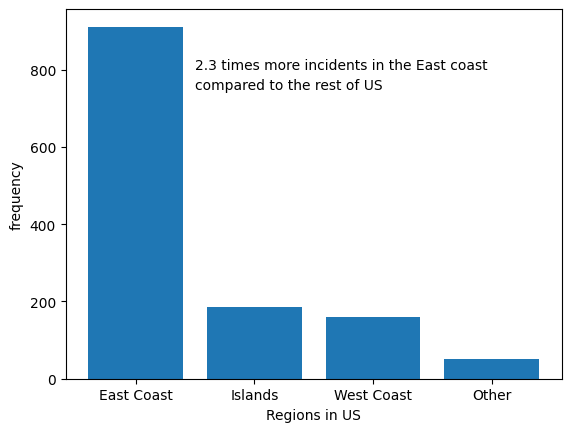

In [21]:
print('-----------------------------------------------------')
print('Frequency of Shark Attacks over the USA by region')
print('-----------------------------------------------------')
#df_USA = filtered_df1.loc[filtered_df1['USA coast'] == 'USA']
x = filtered_df1['USA Coast'].value_counts().index.to_list()
y = list(filtered_df1['USA Coast'].value_counts().values)
fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('Regions in US')
pp = (y[0]/sum(y[1:len(y)+1])).round(2)
label1 = str(pp) + ' times more incidents in the East coast'
label2 = 'compared to the rest of US'
plt.text(0.5, 800, label1, fontsize = 10)
plt.text(0.5, 750, label2, fontsize = 10)
plt.bar(x,y)
plt.show()


# Frequency of Shark Attacks over the East Coast

-----------------------------------------------------
Frequency of Shark Attacks over the East Coast
-----------------------------------------------------


<ipython-input-22-5838e66da3ce>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


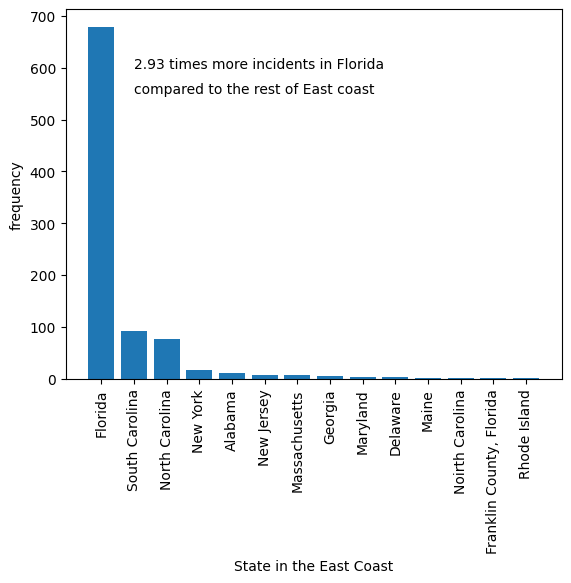

In [22]:
print('-----------------------------------------------------')
print('Frequency of Shark Attacks over the East Coast')
print('-----------------------------------------------------')
df_east = filtered_df1.loc[filtered_df1['USA Coast'] == 'East Coast']

x = df_east['State'].value_counts().index.to_list()
y = list(df_east['State'].value_counts().values)
fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('State in the East Coast')
pp = (y[0]/sum(y[1:len(y)+1])).round(2)
ax.set_xticklabels(x,rotation=90)
label1 = str(pp) + ' times more incidents in Florida'
label2 = 'compared to the rest of East coast'
plt.text(1, 600, label1, fontsize = 10)
plt.text(1, 550, label2, fontsize = 10)
plt.bar(x,y)
plt.show()


# Shark Attacks in Florida

In [23]:
df_east = filtered_df1.loc[filtered_df1['USA Coast'] == 'East Coast']
df_florida = df_east.loc[df_east['State'] == 'Florida']
df_florida

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Unnamed: 11,Time,Species,Source,Month,Season,USA Coast,Injury edited
24,2023-11-05,2023.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Swimming,Steven Reinhardt,M,66,Lacerations to right forearm,N,10h30,NaN,"ABC, 11/15/2023",November,fall,East Coast,non_fatal
40,2023-09-12,2023.0,Questionable,USA,Florida,"NEW SMYRNA BEACH, VOLUSIA COUNTY",Surfing,Mark Summersett,M,38,Llacerations to face and chin,N,07h50,NaN,"Daytona Beach News Journal, 9/13/2023",September,fall,East Coast,non_fatal
41,2023-09-11,2023.0,Unprovoked,USA,Florida,"SATELLITE BEACH, BREVARD COUNTY",Surfing,Bill Eveland,M,NaN,Bite to lower back,N,NaN,NaN,"Fox 35,9/12/2-23",September,fall,East Coast,non_fatal
44,2023-09-04,2023.0,Unprovoked,USA,Florida,"PONCE INLET, VOLUSIA COUNTY",Surfing,male,M,30s,Left hand bitten,N,NaN,NaN,"Click Orlando, 9/4/2023",September,fall,East Coast,non_fatal
45,2023-09-04,2023.0,Unprovoked,USA,Florida,"PONCE INLET, VOLUSIA COUNTY",Wading,female,F,37,Right foot bitten,N,NaN,NaN,"Click Orlando, 9/4/2023",September,fall,East Coast,non_fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,2000-03-31,2000.0,Unprovoked,USA,Florida,SANTA ROSA SOUND ESCAMBIA COUNTY,Fishing,Dave Edwards,M,NaN,"No Injury, bumped by shark",N,NaN,NaN,"R. Aiden Martin, GSAF; Pensacola News Journal ...",March,spring,East Coast,non_fatal
2677,2000-03-26,2000.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Boogie boarding,Heather Van Olst,F,14,Right knee lacerated,N,11h15,1.8 m [6'] shark,"Stuart News, 3/28/2000; Jupiter Couier, 3/29/2000",March,spring,East Coast,non_fatal
2678,2000-03-24,2000.0,Unprovoked,USA,Florida,"FLORIDANA BEACH, BREVARD COUNTY",Surfing,Barry Pasonski,M,37,Left hand bitten,N,14h00,1.2 m [4'] shark,"Orlando Sentinel, 3/25/2000, p.D.3",March,spring,East Coast,non_fatal
2686,2000-02-21,2000.0,Unprovoked,USA,Florida,"RIVIERA BEACH, PALM BEACH COUNTY",NaN,male,M,27,Right calf bitten,N,Afternoon,NaN,"The Palm Beach Post, 2/22/2000",February,winter,East Coast,non_fatal


## Cleaning County Series

In [24]:
df_florida['county'] = df_florida['Location'].str.split(',').str[-1].str.strip()
#df_florida

<ipython-input-24-86efcdb57288>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida['county'] = df_florida['Location'].str.split(',').str[-1].str.strip()


In [25]:
print('Unique values in County')
print(df_florida['county'].unique())
print(df_florida['county'].nunique())

Unique values in County
['PALM BEACH COUNTY' 'VOLUSIA COUNTY' 'BREVARD COUNTY' 'MANATEE COUNTY'
 'TAMPA BAY' 'NEW SMYRNA BEACH' 'MIAMI-DADE COUNTY' 'MONROE COUNTY'
 'ST. LUCIE COUNTY' 'OFF BOCA RATON. PALM BEACH COUNTY' 'MARTIN COUNTY'
 '70 MILES OFF PENSACOLA' 'HOBE SOUND' 'GULF COUNTY' '' 'PINELLAS COUNTY'
 'CANAVERAL NATIONAL SEASHORE' 'BREVARD  COUNTY' 'DUVAL COUNTY'
 'WALTON COUNTY' 'INDIAN RIVER COUNTY' 'BROWARD COUNTY' 'OFF TAMPA BAY'
 'ORMOND BEACH' 'NEAR KEY LARGO' 'ST. JOHNS COUNTY' 'CHARLOTTE COUNTY'
 'FLORIDA KEYS' 'OFF KEY BISCAYNE' 'NASSAU COUNTY' 'LEE COUNTY'
 'ST JOHNS COUNTY' 'KEY BISCAYNE' 'FORT WORTH' 'BATHTUB BEACH'
 'OFF JUPITER' nan 'ST. AUGUSTINE' 'OKALOOSA COUNTY' 'JENSEN BEACH'
 'ST LUCIE COUNTY' 'MAYPORT NAVAL STATION  DUVAL COUNTY' 'FLAGLER COUNTY'
 'ST.  JOHNS COUNTY' 'DAYTONA BEACH SHORES' 'FORT LAUDERDALE'
 'MARCO ISLAND' 'OFF PANAMA CITY' 'APALACHICOLA BAY' 'OKALOOSA ISLAND'
 'DELRAY BEACH' 'MACARTHUR STATE PARK' 'MIAMI BEACH' 'BAY COUNTY'
 'ESCAMBIA COUN

In [26]:
county_mapping = {
    'VOLUSIA COUNTYY': 'VOLUSIA COUNTY',
    'ST LUCIE COUNTY': 'ST. LUCIE COUNTY',
    'ST JOHNS COUNTY': 'ST. JOHNS COUNTY',
    'ST AUGUSTINE': 'ST. AUGUSTINE',
    'DUVAL COUNTRY': 'DUVAL COUNTY',
    'DUVAL COUNTY': 'DUVAL COUNTY',
    'ST. AUGUSTINE  ST. JOHNS COUNTY': 'ST. JOHNS COUNTY',
    'ST. JOHN COUNTY': 'ST. JOHNS COUNTY',
    'ST. JOHN\'S COUNTY': 'ST. JOHNS COUNTY',
    'ST. JOHNS COUNTY': 'ST. JOHNS COUNTY',
    'ST. AUGUSTINE BEACH. ST. JOHNS COUNTY': 'ST. JOHNS COUNTY',
    'ST. LUCIE COUNY': 'ST. LUCIE COUNTY',
    'VOLUSIA COUNTYY': 'VOLUSIA COUNTY',
    'BREVARD COUNTY': 'BREVARD COUNTY',
    'BREVARD  COUNTY': 'BREVARD COUNTY',
    'INDIAN RIVER OR BREVARD COUNTY': 'BREVARD COUNTY',
    'NEAR PATRICK AIR FORCE BASE BREVARD COUNTY': 'BREVARD COUNTY',
}

df_florida['county_new'] = [county_mapping.get(county, county) for county in df_florida['county']]
df_florida.head()


<ipython-input-26-e4f00cfd1141>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida['county_new'] = [county_mapping.get(county, county) for county in df_florida['county']]


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Unnamed: 11,Time,Species,Source,Month,Season,USA Coast,Injury edited,county,county_new
24,2023-11-05,2023.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Swimming,Steven Reinhardt,M,66,...,N,10h30,NaN,"ABC, 11/15/2023",November,fall,East Coast,non_fatal,PALM BEACH COUNTY,PALM BEACH COUNTY
40,2023-09-12,2023.0,Questionable,USA,Florida,"NEW SMYRNA BEACH, VOLUSIA COUNTY",Surfing,Mark Summersett,M,38,...,N,07h50,NaN,"Daytona Beach News Journal, 9/13/2023",September,fall,East Coast,non_fatal,VOLUSIA COUNTY,VOLUSIA COUNTY
41,2023-09-11,2023.0,Unprovoked,USA,Florida,"SATELLITE BEACH, BREVARD COUNTY",Surfing,Bill Eveland,M,NaN,...,N,NaN,NaN,"Fox 35,9/12/2-23",September,fall,East Coast,non_fatal,BREVARD COUNTY,BREVARD COUNTY
44,2023-09-04,2023.0,Unprovoked,USA,Florida,"PONCE INLET, VOLUSIA COUNTY",Surfing,male,M,30s,...,N,NaN,NaN,"Click Orlando, 9/4/2023",September,fall,East Coast,non_fatal,VOLUSIA COUNTY,VOLUSIA COUNTY
45,2023-09-04,2023.0,Unprovoked,USA,Florida,"PONCE INLET, VOLUSIA COUNTY",Wading,female,F,37,...,N,NaN,NaN,"Click Orlando, 9/4/2023",September,fall,East Coast,non_fatal,VOLUSIA COUNTY,VOLUSIA COUNTY


In [27]:
''''
print('Unique values in County')
print(df_florida['county_new'].unique())
print(df_florida['county_new'].nunique())
'''

"'\nprint('Unique values in County')\nprint(df_florida['county_new'].unique())\nprint(df_florida['county_new'].nunique())\n"

## Cleaning the 'Time' Series and creating a new series of periods in a day [morning afternoon night]

In [28]:
from dateutil import parser
import re

# Function to classify time of day based on a string input
def classify_time_of_day(time_str):
    if pd.isna(time_str) or not time_str.strip():
        return None

    time_str = time_str.strip().lower()

    named_times = {
        'morning': 'Morning',
        'afternoon': 'Afternoon',
        'night': 'Evening',
        'early morning': 'Morning',
        'late morning': 'Morning',
        'midday': 'Afternoon',
        'noon': 'Afternoon',
        'dawn': 'Morning',
        'dusk': 'Evening',
        'evening': 'Evening',
        'early afternoon': 'Afternoon',
        'late afternoon': 'Afternoon',
        'early evening': 'Evening',
        'late night': 'Evening',
        'midnight': 'Evening',
        'sunset': 'Evening',
        'daybreak': 'Morning',
        'nightfall': 'Evening',
        'daytime': 'Afternoon',
        'dark': 'Evening'
    }

    if time_str in named_times:
        return named_times[time_str]

    # Try to parse time in different formats
    time_formats = [
        '%H:%M', '%I:%M %p', '%H.%M', '%H%M', '%I%M%p', '%I.%M%p', '%I%p',
        '%Hh%M', '%Ih%M%p', '%Hh%M', '%Ih%M', '%I:%M%p', '%I %p', '%I.%M%p',
        '%I %M %p', '%I %M%p', '%H %M', '%H.%M'
    ]

    for fmt in time_formats:
        try:
            parsed_time = pd.to_datetime(time_str, format=fmt).time()
            hour = parsed_time.hour
            if 5 <= hour < 12:
                return 'Morning'
            elif 12 <= hour < 18:
                return 'Afternoon'
            else:
                return 'Evening'
        except ValueError:
            continue

    # Handle special cases
    if re.match(r'\d+h\d+', time_str):
        try:
            parsed_time = pd.to_datetime(time_str.replace('h', ':'), format='%H:%M').time()
            hour = parsed_time.hour
            if 5 <= hour < 12:
                return 'Morning'
            elif 12 <= hour < 18:
                return 'Afternoon'
            else:
                return 'Evening'
        except ValueError:
            pass

    # Handle time ranges by taking the first time
    if '-' in time_str or '/' in time_str:
        time_str = re.split(r'[-/]', time_str)[0].strip()
        for fmt in time_formats:
            try:
                parsed_time = pd.to_datetime(time_str, format=fmt).time()
                hour = parsed_time.hour
                if 5 <= hour < 12:
                    return 'Morning'
                elif 12 <= hour < 18:
                    return 'Afternoon'
                else:
                    return 'Evening'
            except ValueError:
                continue

    # Handle keywords like 'before', 'after', 'shortly before', 'just before', etc.
    keywords = {
        'before': 'Morning',
        'after': 'Afternoon',
        'shortly before': 'Morning',
        'just before': 'Morning',
        'after dusk': 'Evening',
        'after noon': 'Afternoon',
        'after dark': 'Evening',
        'early evening': 'Evening',
        'late afternoon': 'Afternoon',
        'mid-morning': 'Morning',
        'mid-afternoon': 'Afternoon',
        'early afternoon': 'Afternoon',
        'late evening': 'Evening'
    }

    for keyword, period in keywords.items():
        if keyword in time_str:
            return period

    return None

# Create a new column that matches 'M', 'A', 'N' with the corresponding time of day
def match_time_abbreviation(time_str):
    if pd.isna(time_str) or not time_str.strip():
        return None
    return {
        'M': 'Morning',
        'A': 'Afternoon',
        'N': 'Evening'
    }.get(time_str.strip().upper(), None)

# Function to parse dates with multiple formats
def parse_dates(date_str):
    if pd.isna(date_str) or not date_str.strip():
        return None
    try:
        return parser.parse(date_str, fuzzy=True)
    except ValueError:
        return None

# Apply the date parsing function
# df['ParsedDate'] = df['Date'].apply(parse_dates)

# Apply the time classification functions
df_florida['TimeOfDay'] = df_florida['Time'].apply(classify_time_of_day)

# df_florida['TimeAbbreviation'] = df_florida['Time'].apply(match_time_abbreviation)

# df_florida['FinalTimeOfDay'] = df_florida['TimeOfDay'].combine_first(df['TimeAbbreviation'])

# Filter data to include only attacks in the United States and necessary columns
# df = df[df['Country'] == 'USA']

# Filter by years 2000-2023
# df = df[(df['ParsedDate'].dt.year >= 2000) & (df['ParsedDate'].dt.year <= 2023)]

# Drop unnecessary columns
#df = df[['ParsedDate', 'State', 'FinalTimeOfDay']]

# Remove rows where 'FinalTimeOfDay' is None
#df = df.dropna(subset=['FinalTimeOfDay'])

# Group by time of day, date, and state and count the occurrences
#time_of_day_counts = df.groupby(['FinalTimeOfDay', 'ParsedDate', 'State']).size().reset_index(name='Count')

# Display the dataframe with counts by time of day
#display(time_of_day_counts)

# Display the first few rows of the filtered dataframe for verification
#display(df.head())

<ipython-input-28-a4ea971cffd4>:133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida['TimeOfDay'] = df_florida['Time'].apply(classify_time_of_day)


In [29]:
df_florida

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Time,Species,Source,Month,Season,USA Coast,Injury edited,county,county_new,TimeOfDay
24,2023-11-05,2023.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Swimming,Steven Reinhardt,M,66,...,10h30,NaN,"ABC, 11/15/2023",November,fall,East Coast,non_fatal,PALM BEACH COUNTY,PALM BEACH COUNTY,Morning
40,2023-09-12,2023.0,Questionable,USA,Florida,"NEW SMYRNA BEACH, VOLUSIA COUNTY",Surfing,Mark Summersett,M,38,...,07h50,NaN,"Daytona Beach News Journal, 9/13/2023",September,fall,East Coast,non_fatal,VOLUSIA COUNTY,VOLUSIA COUNTY,Morning
41,2023-09-11,2023.0,Unprovoked,USA,Florida,"SATELLITE BEACH, BREVARD COUNTY",Surfing,Bill Eveland,M,NaN,...,NaN,NaN,"Fox 35,9/12/2-23",September,fall,East Coast,non_fatal,BREVARD COUNTY,BREVARD COUNTY,None
44,2023-09-04,2023.0,Unprovoked,USA,Florida,"PONCE INLET, VOLUSIA COUNTY",Surfing,male,M,30s,...,NaN,NaN,"Click Orlando, 9/4/2023",September,fall,East Coast,non_fatal,VOLUSIA COUNTY,VOLUSIA COUNTY,None
45,2023-09-04,2023.0,Unprovoked,USA,Florida,"PONCE INLET, VOLUSIA COUNTY",Wading,female,F,37,...,NaN,NaN,"Click Orlando, 9/4/2023",September,fall,East Coast,non_fatal,VOLUSIA COUNTY,VOLUSIA COUNTY,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,2000-03-31,2000.0,Unprovoked,USA,Florida,SANTA ROSA SOUND ESCAMBIA COUNTY,Fishing,Dave Edwards,M,NaN,...,NaN,NaN,"R. Aiden Martin, GSAF; Pensacola News Journal ...",March,spring,East Coast,non_fatal,SANTA ROSA SOUND ESCAMBIA COUNTY,SANTA ROSA SOUND ESCAMBIA COUNTY,None
2677,2000-03-26,2000.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Boogie boarding,Heather Van Olst,F,14,...,11h15,1.8 m [6'] shark,"Stuart News, 3/28/2000; Jupiter Couier, 3/29/2000",March,spring,East Coast,non_fatal,PALM BEACH COUNTY,PALM BEACH COUNTY,Morning
2678,2000-03-24,2000.0,Unprovoked,USA,Florida,"FLORIDANA BEACH, BREVARD COUNTY",Surfing,Barry Pasonski,M,37,...,14h00,1.2 m [4'] shark,"Orlando Sentinel, 3/25/2000, p.D.3",March,spring,East Coast,non_fatal,BREVARD COUNTY,BREVARD COUNTY,Afternoon
2686,2000-02-21,2000.0,Unprovoked,USA,Florida,"RIVIERA BEACH, PALM BEACH COUNTY",NaN,male,M,27,...,Afternoon,NaN,"The Palm Beach Post, 2/22/2000",February,winter,East Coast,non_fatal,PALM BEACH COUNTY,PALM BEACH COUNTY,Afternoon


## Cleaning the 'Activity' series and creating a new series of grouped activities

In [30]:
# initial categorization function
def initial_categorize_activity(activity):
    activity_str = str(activity)  # Ensure the activity is treated as a string
    activity_lower = activity_str.lower()
    if 'swim' in activity_lower:
        return 'swimming_1'
    elif 'fish' in activity_lower:
        return 'fishing_1'
    elif 'surf' in activity_lower or 'board' in activity_lower:
        return 'water_sports_1'
    else:
        return 'other_1'


df_florida['Activity'] = df_florida['Activity'].astype(str)


df_florida['initial_category'] = df_florida['Activity'].apply(initial_categorize_activity)

# manual categorization dictionary
manual_categorization = {
    'Sitting': 'other',
    'Wading': 'swimming',
    'Lobstering': 'fishing',
    'Scalloping': 'fishing',
    'Jumped into water': 'swimming',
    'Standing': 'other',
    'Playing': 'other',
    'Walking': 'other',
    'Feeding sharks': 'other',
    'Photo shoot': 'other',
    'Teasing a shark': 'other',
    'SUP': 'water sports',
    'Photographing fish': 'other',
    'Attempting to rescue a shark': 'other',
    'Photographing the shark': 'other',
    'Casting a net': 'fishing',
    'Playing in the surf': 'water sports',
    'Free diving ': 'water sports',
    'Jet skiing': 'water sports',
    'Scuba diving': 'water sports',
    'Measuring sharks': 'other',
    'Crawling': 'other',
    'Walking out of the water after surfing': 'water sports',
    'Wading?': 'swimming',
    'Jumping': 'other',
    'Floating near boat & observing bioluminesce': 'other',
    'Jumped into the water': 'swimming',
    'Removing hook from shark': 'fishing',
    'Playing on a sandbar': 'other',
    'Shrimping': 'fishing',
    'Playing soccer in the water': 'other',
    'Diving / Kissing the shark': 'water sports',
    'Treading water/ Surfing': 'water sports',
    'Standing / Surfing': 'water sports',
    'Crouching in 2\' of water': 'swimming',
    'In water with diving seabirds': 'water sports',
    'Walking, carrying surfboard & stepped on shark': 'water sports',
    'Petting captive sharks': 'other',
    'Floating on a raft': 'water sports',
    'Playing in the surf with his 2 dogs': 'water sports',
    'Wreck / Technical diving': 'water sports',
    'Walking in shallows': 'swimming',
    'Attempting to illegally enter the USA': 'other',
    'Sailing': 'water sports'
}

# Apply to the relevant rows
df_florida.loc[df_florida['initial_category'] == 'other_1', 'manual_category'] = df_florida['Activity'].map(manual_categorization)

# Combine initial and manual categorization into 'Activity Category'
df_florida['Activity Category'] = df_florida['initial_category']
df_florida.loc[df_florida['initial_category'] == 'other_1', 'Activity Category'] = df_florida['manual_category']

# Replace final category names
df_florida['Activity Category'] = df_florida['Activity Category'].replace({
    'swimming_1': 'swimming',
    'fishing_1': 'fishing',
    'water_sports_1': 'water sports'
})


df_florida.drop(columns=['initial_category', 'manual_category'], inplace=True)

# THE ORDER OF THE COLUMN WILL NEED TO BE CHANGE, SAME AS FOR THE USA STATES
df_florida

#sns.countplot(x='Activity Category', data=df_florida)

<ipython-input-30-7b7ea2b2fafd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida['Activity'] = df_florida['Activity'].astype(str)
<ipython-input-30-7b7ea2b2fafd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_florida['initial_category'] = df_florida['Activity'].apply(initial_categorize_activity)
<ipython-input-30-7b7ea2b2fafd>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,Month,Season,USA Coast,Injury edited,county,county_new,TimeOfDay,Activity Category
24,2023-11-05,2023.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Swimming,Steven Reinhardt,M,66,...,NaN,"ABC, 11/15/2023",November,fall,East Coast,non_fatal,PALM BEACH COUNTY,PALM BEACH COUNTY,Morning,swimming
40,2023-09-12,2023.0,Questionable,USA,Florida,"NEW SMYRNA BEACH, VOLUSIA COUNTY",Surfing,Mark Summersett,M,38,...,NaN,"Daytona Beach News Journal, 9/13/2023",September,fall,East Coast,non_fatal,VOLUSIA COUNTY,VOLUSIA COUNTY,Morning,water sports
41,2023-09-11,2023.0,Unprovoked,USA,Florida,"SATELLITE BEACH, BREVARD COUNTY",Surfing,Bill Eveland,M,NaN,...,NaN,"Fox 35,9/12/2-23",September,fall,East Coast,non_fatal,BREVARD COUNTY,BREVARD COUNTY,None,water sports
44,2023-09-04,2023.0,Unprovoked,USA,Florida,"PONCE INLET, VOLUSIA COUNTY",Surfing,male,M,30s,...,NaN,"Click Orlando, 9/4/2023",September,fall,East Coast,non_fatal,VOLUSIA COUNTY,VOLUSIA COUNTY,None,water sports
45,2023-09-04,2023.0,Unprovoked,USA,Florida,"PONCE INLET, VOLUSIA COUNTY",Wading,female,F,37,...,NaN,"Click Orlando, 9/4/2023",September,fall,East Coast,non_fatal,VOLUSIA COUNTY,VOLUSIA COUNTY,None,swimming
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,2000-03-31,2000.0,Unprovoked,USA,Florida,SANTA ROSA SOUND ESCAMBIA COUNTY,Fishing,Dave Edwards,M,NaN,...,NaN,"R. Aiden Martin, GSAF; Pensacola News Journal ...",March,spring,East Coast,non_fatal,SANTA ROSA SOUND ESCAMBIA COUNTY,SANTA ROSA SOUND ESCAMBIA COUNTY,None,fishing
2677,2000-03-26,2000.0,Unprovoked,USA,Florida,"JUNO BEACH, PALM BEACH COUNTY",Boogie boarding,Heather Van Olst,F,14,...,1.8 m [6'] shark,"Stuart News, 3/28/2000; Jupiter Couier, 3/29/2000",March,spring,East Coast,non_fatal,PALM BEACH COUNTY,PALM BEACH COUNTY,Morning,water sports
2678,2000-03-24,2000.0,Unprovoked,USA,Florida,"FLORIDANA BEACH, BREVARD COUNTY",Surfing,Barry Pasonski,M,37,...,1.2 m [4'] shark,"Orlando Sentinel, 3/25/2000, p.D.3",March,spring,East Coast,non_fatal,BREVARD COUNTY,BREVARD COUNTY,Afternoon,water sports
2686,2000-02-21,2000.0,Unprovoked,USA,Florida,"RIVIERA BEACH, PALM BEACH COUNTY",nan,male,M,27,...,NaN,"The Palm Beach Post, 2/22/2000",February,winter,East Coast,non_fatal,PALM BEACH COUNTY,PALM BEACH COUNTY,Afternoon,NaN


# Shark Attacks in Florida Insights


## Fatality Rate

-----------------------------------------------------
Frequency of Fatal Shark Attacks in Florida
-----------------------------------------------------


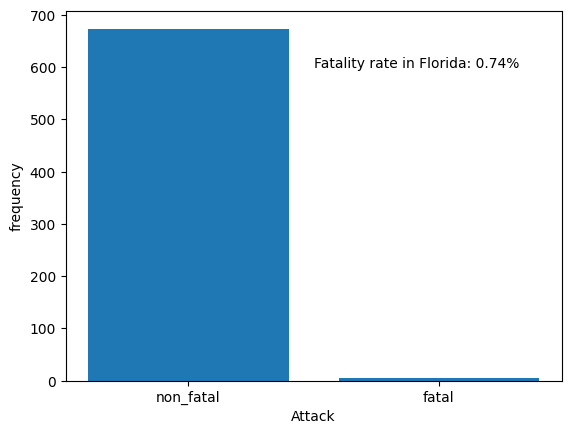

In [31]:
def fatality_rate(data):
    # Calculate fatality rate for the specified injury type
    total_injuries = data.count()
    fatal_injuries = data[data == 'fatal'].count()
    fatality_rate = (fatal_injuries / total_injuries) * 100
    return fatality_rate


print('-----------------------------------------------------')
print('Frequency of Fatal Shark Attacks in Florida')
print('-----------------------------------------------------')

x = df_florida['Injury edited'].value_counts().index.to_list()
y = list(df_florida['Injury edited'].value_counts().values)
fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('Attack')
pp = "Fatality rate in Florida: {:.2f}%".format(fatality_rate(df_florida['Injury edited']))
#ax.set_xticklabels(x,rotation=90)
label1 = str(pp)
plt.text(0.5, 600, label1, fontsize = 10)
plt.bar(x,y)
plt.show()

## Incidents per Season

-----------------------------------------------------
Frequency of Shark Attacks in Florida per Season
-----------------------------------------------------


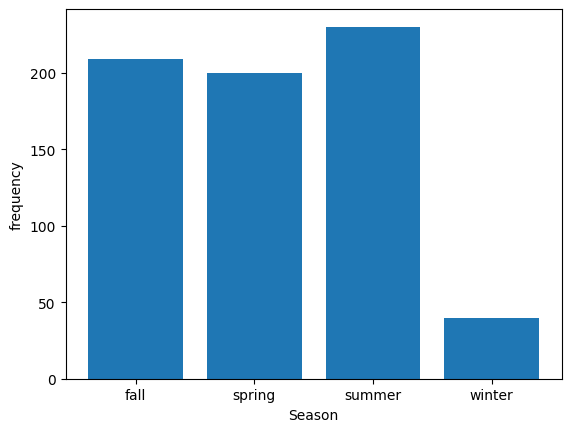

In [32]:
print('-----------------------------------------------------')
print('Frequency of Shark Attacks in Florida per Season')
print('-----------------------------------------------------')

grouped_season = df_florida.groupby('Season').agg(['count'])
grouped_season

x = list(grouped_season['Year'].index.values)
y = grouped_season['Year'].iloc[:, 0].value_counts().index.to_list()
fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('Season')
#pp = "Fatality rate in Florida: {:.2f}%".format(fatality_rate(df_florida['Injury edited']))
#ax.set_xticklabels(x,rotation=90)
#label1 = str(pp)
#plt.text(0.5, 600, label1, fontsize = 10)
plt.bar(x,y)
plt.show()

## Incidents per Month

-----------------------------------------------------
Frequency of Shark Attacks in Florida per Month
-----------------------------------------------------


<ipython-input-33-bc46643b6163>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x,rotation=90)


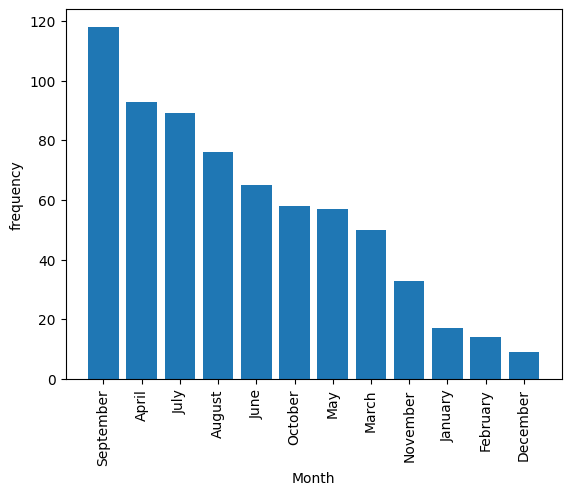

In [33]:
print('-----------------------------------------------------')
print('Frequency of Shark Attacks in Florida per Month')
print('-----------------------------------------------------')

x = df_florida['Month'].value_counts().index.to_list()
y = list(df_florida['Month'].value_counts().values)
fig, ax = plt.subplots()
ax.set_ylabel('frequency')
ax.set_xlabel('Month')
#pp = "Fatality rate in Florida: {:.2f}%".format(fatality_rate(df_florida['Injury edited']))
ax.set_xticklabels(x,rotation=90)
#label1 = str(pp)
#plt.text(0.5, 600, label1, fontsize = 10)
plt.bar(x,y)
plt.show()

## Incidents per County & Season

In [34]:
grouped_location = df_florida.groupby(['county_new','Season']).agg(['count'])
#grouped_location['Year'].sort_values(by='count',ascending=False).head(20)

In [35]:
volusia_incidents = grouped_location.loc['VOLUSIA COUNTY', :]
brevard_incidents = grouped_location.loc['BREVARD COUNTY', :]
monroe_incidents = grouped_location.loc['MONROE COUNTY', :]
palm_beach_incidents = grouped_location.loc['PALM BEACH COUNTY', :]

a1 = list(volusia_incidents['Year'].values.flatten())
a2 = list(brevard_incidents['Year'].values.flatten())
a3 = list(monroe_incidents['Year'].values.flatten())
a4 = list(palm_beach_incidents['Year'].values.flatten())
y1 = [list_[0] for list_ in [a1, a2, a3, a4]]
y2 = [list_[1] for list_ in [a1, a2, a3, a4]]
y3 = [list_[2] for list_ in [a1, a2, a3, a4]]
y4 = [list_[3] for list_ in [a1, a2, a3, a4]]

x = ['VOLUSIA', 'BREVARD', 'MONROE', 'PALM BEACH']


-------------------------------------------------------------------------
Frequency of Shark Attacks in the top 4 Counties in Attacks over the Year
-------------------------------------------------------------------------


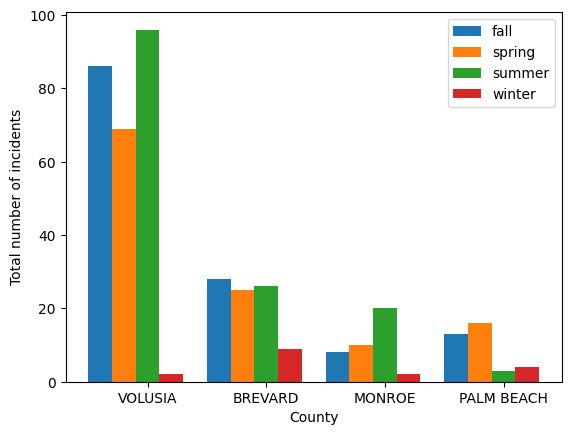

In [36]:
print('-------------------------------------------------------------------------')
print('Frequency of Shark Attacks in the top 4 Counties in Attacks over the Year')
print('-------------------------------------------------------------------------')

fig, ax = plt.subplots()
#y = grouped_location['VOLUSIA COUNTY']

#x = list(grouped_location['Year'].index.values)
#y = grouped_location['Year'].iloc[:, 0].value_counts().index.to_list()
X_axis = np.arange(len(x))

plt.bar(X_axis - 0.4, y1, 0.2, label = 'fall')
plt.bar(X_axis - 0.2, y2, 0.2, label = 'spring')
plt.bar(X_axis + 0.0, y3, 0.2, label = 'summer')
plt.bar(X_axis + 0.2, y4, 0.2, label = 'winter')

#ax.set_xticklabels(x,rotation=45)
plt.xticks(X_axis, x)
plt.xlabel("County")
plt.ylabel("Total number of incidents")

plt.legend()
plt.show()

## Incidents in Volusia County during summer and fall and Time during the day

In [37]:
df_volusia = df_florida.loc[df_florida['county_new'] == 'VOLUSIA COUNTY']
df_volusia = df_florida.loc[(df_florida['Season'] == 'fall') | (df_florida['Season'] == 'summer')]

In [38]:
grouped_month = df_volusia.groupby(['Month','TimeOfDay']).agg(['count'])
grouped_month
#grouped_month['Year'].sort_values(by='count',ascending=False).head(20)

Date  Year  Type Country State Location Activity  Name  \
                    count count count   count count    count    count count   
Month     TimeOfDay                                                           
August    Afternoon    45    45    45      45    45       45       45    45   
          Evening       7     7     7       7     7        7        7     7   
          Morning      16    16    16      16    16       16       16    16   
July      Afternoon    46    46    45      46    46       46       46    46   
          Evening       8     8     8       8     8        8        8     8   
          Morning      12    12    12      12    12       12       12    12   
June      Afternoon    30    30    30      30    30       30       30    30   
          Evening       4     4     4       4     4        4        4     4   
          Morning      14    14    14      14    14       14       14    14   
November  Afternoon    19    19    19      19    19       19       19    19   
          Morning       6     6     6       6     6        6        6     6   
October   Afternoon    36    36    36      36    36       36       36    36   
          Evening       2     2     2       2     2        2        2     2   
          Morning      10    10    10      10    10       10       10    10   
September Afternoon    56    56    55      56    56       56       56    55   
          Evening       7     7     7       7     7        7        7     7   
          Morning      36    36    36      36    36       36       36    36   

                      Sex   Age  ... Unnamed: 11  Time Species  Source Season  \
                    count count  ...       count count    count  count  count   
Month     TimeOfDay              ...                                            
August    Afternoon    44    44  ...          44    45       21     45     45   
          Evening       7     5  ...           5     7        4      7      7   
          Morning      16    15  ...          16    16        9     15     16   
July      Afternoon    46    43  ...          46    46       15     46     46   
          Evening       8     8  ...           8     8        2      8      8   
          Morning      12    12  ...          11    12        2     12     12   
June      Afternoon    29    26  ...          28    30       17     30     30   
          Evening       4     3  ...           3     4        3      4      4   
          Morning      13    11  ...          14    14        6     14     14   
November  Afternoon    19    18  ...          19    19       11     19     19   
          Morning       6     5  ...           5     6        3      6      6   
October   Afternoon    36    29  ...          35    36       16     36     36   
          Evening       2     2  ...           2     2        0      2      2   
          Morning      10     9  ...          10    10        6     10     10   
September Afternoon    55    51  ...          55    56       33     56     56   
          Evening       7     6  ...           7     7        4      7      7   
          Morning      36    30  ...          35    36       11     36     36   

                    USA Coast Injury edited county county_new  \
                        count         count  count      count   
Month     TimeOfDay                                             
August    Afternoon        45            45     45         45   
          Evening           7             7      7          7   
          Morning          16            16     16         16   
July      Afternoon        46            46     46         46   
          Evening           8             8      8          8   
          Morning          12            12     12         12   
June      Afternoon        30            30     30         30   
          Evening           4             4      4          4   
          Morning          14            14     14         14   
November  Afternoon        19          

In [39]:
august_incidents = grouped_month.loc['August', :]
july_incidents = grouped_month.loc['July', :]
june_incidents = grouped_month.loc['June', :]
october_incidents = grouped_month.loc['October', :]
september_incidents = grouped_month.loc['September', :]

a1 = list(june_incidents['Year'].values.flatten())
a2 = list(july_incidents['Year'].values.flatten())
a3 = list(august_incidents['Year'].values.flatten())
a4 = list(september_incidents['Year'].values.flatten())
a5 = list(october_incidents['Year'].values.flatten())



y1 = [list_[0] for list_ in [a1, a2, a3, a4, a5]]
y2 = [list_[1] for list_ in [a1, a2, a3, a4, a5]]
y3 = [list_[2] for list_ in [a1, a2, a3, a4, a5]]


x = ['June', 'July', 'August', 'September', 'October']

-------------------------------------------------------------------------------------
Frequency of Shark Attacks during the day in Volusia County between June and October 
-------------------------------------------------------------------------------------


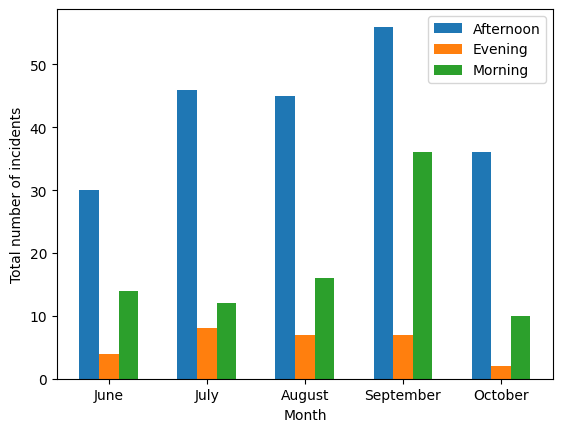

In [40]:
print('-------------------------------------------------------------------------------------')
print('Frequency of Shark Attacks during the day in Volusia County between June and October ')
print('-------------------------------------------------------------------------------------')

fig, ax = plt.subplots()
#y = grouped_location['VOLUSIA COUNTY']

#x = list(grouped_location['Year'].index.values)
#y = grouped_location['Year'].iloc[:, 0].value_counts().index.to_list()
X_axis = np.arange(len(x))

plt.bar(X_axis - 0.2, y1, 0.2, label = 'Afternoon')
plt.bar(X_axis + 0.0, y2, 0.2, label = 'Evening')
plt.bar(X_axis + 0.2, y3, 0.2, label = 'Morning')


#ax.set_xticklabels(x,rotation=45)
plt.xticks(X_axis, x)
plt.xlabel("Month")
plt.ylabel("Total number of incidents")

plt.legend()
plt.show()

## Activities related to the incidents in Volusia County during the summer and spring

In [41]:
grouped_month1 = df_volusia.groupby(['Month','Activity Category']).agg(['count'])
grouped_month1

Date  Year  Type Country State Location Activity  \
                            count count count   count count    count    count   
Month     Activity Category                                                     
August    fishing               4     4     4       4     4        4        4   
          other                11    11    11      11    11       11       11   
          swimming             18    18    18      18    18       18       18   
          water sports         37    37    37      37    37       37       37   
July      fishing              11    11    11      11    11       11       11   
          other                 8     8     8       8     8        8        8   
          swimming             21    21    21      21    21       21       21   
          water sports         37    37    37      37    37       37       37   
June      fishing               9     9     9       9     9        9        9   
          other                 9     9     9       9     9        9        9   
          swimming             20    20    20      20    20       20       20   
          water sports         25    25    25      25    25       25       25   
November  fishing               1     1     1       1     1        1        1   
          other                 1     1     1       1     1        1        1   
          swimming              6     6     6       6     6        6        6   
          water sports         25    25    25      25    25       25       25   
October   fishing               6     6     6       6     6        6        6   
          other                 1     1     1       1     1        1        1   
          swimming             10    10    10      10    10       10       10   
          water sports         39    39    39      39    39       39       39   
September fishing               9     9     8       9     9        9        9   
          other                 4     4     4       4     4        4        4   
          swimming             27    27    26      27    27       27       27   
          water sports         71    71    71      71    71       71       71   

                             Name   Sex   Age  ... Unnamed: 11  Time Species   \
                            count count count  ...       count count    count   
Month     Activity Category                    ...                              
August    fishing               4     4     3  ...           4     2        3   
          other                11    11    10  ...          10    10        6   
          swimming             18    18    17  ...          17    17        6   
          water sports         37    37    37  ...          37    34       20   
July      fishing              11    11     8  ...          11     4        8   
          other                 8     8     8  ...           8     7        3   
          swimming             21    21    21  ...          21    19        8   
          water sports         37    37    37  ...          36    31        9   
June      fishing               9     9     4  ...           9     5        7   
          other                 9     9     9  ...           8     5        5   
          swimming             20    20    15  ...          19    18       10   
          water sports         25    23    20  ...          24    19       11   
November  fishing               1     1     1  ...           1     1        0   
          other                 1     1     1  ...           0     0        1   
          swimming              6     6     5  ...           6     6        3   
          water sports         25    25    23  ...          24    19       15   
October   fishing               6     6     4  ...           6     3        2   
          other                 1     1     1  ...           1     1        1   
          swimming             10    10     7  ...          10     9        6   
          water sports         39    39    34  ...         

In [42]:
august_incidents = grouped_month1.loc['August', :]
july_incidents = grouped_month1.loc['July', :]
june_incidents = grouped_month1.loc['June', :]
october_incidents = grouped_month1.loc['October', :]
september_incidents = grouped_month1.loc['September', :]

a1 = list(june_incidents['Year'].values.flatten())
a2 = list(july_incidents['Year'].values.flatten())
a3 = list(august_incidents['Year'].values.flatten())
a4 = list(september_incidents['Year'].values.flatten())
a5 = list(october_incidents['Year'].values.flatten())



y1 = [list_[0] for list_ in [a1, a2, a3, a4, a5]]
y2 = [list_[1] for list_ in [a1, a2, a3, a4, a5]]
y3 = [list_[2] for list_ in [a1, a2, a3, a4, a5]]
y4 = [list_[3] for list_ in [a1, a2, a3, a4, a5]]


x = ['June', 'July', 'August', 'September', 'October']

---------------------------------------------------------------------------------------
Types of Activities related to Shark Attacks in Volusia County between June and October
---------------------------------------------------------------------------------------


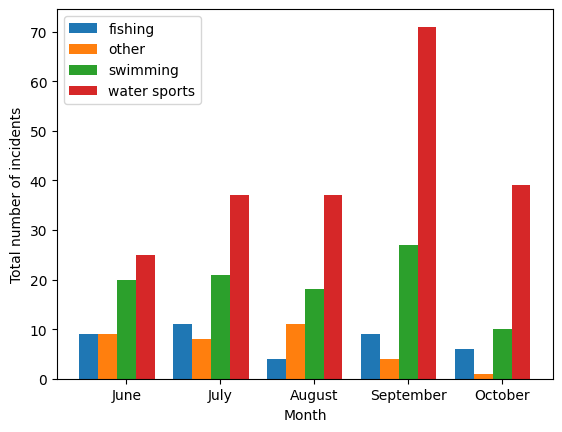

In [43]:
print('---------------------------------------------------------------------------------------')
print('Types of Activities related to Shark Attacks in Volusia County between June and October')
print('---------------------------------------------------------------------------------------')

fig, ax = plt.subplots()
#y = grouped_location['VOLUSIA COUNTY']

#x = list(grouped_location['Year'].index.values)
#y = grouped_location['Year'].iloc[:, 0].value_counts().index.to_list()
X_axis = np.arange(len(x))

plt.bar(X_axis - 0.4, y1, 0.2, label = 'fishing')
plt.bar(X_axis - 0.2, y2, 0.2, label = 'other')
plt.bar(X_axis + 0.0, y3, 0.2, label = 'swimming')
plt.bar(X_axis + 0.2, y4, 0.2, label = 'water sports')


#ax.set_xticklabels(x,rotation=45)
plt.xticks(X_axis, x)
plt.xlabel("Month")
plt.ylabel("Total number of incidents")

plt.legend()
plt.show()